In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# own development
from library import get_data, normalize

In [17]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [18]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [19]:
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2019, 1, 1)
tesla = quandl.get('WIKI/TSLA',start_date=start,end_date=end)

In [20]:
raw_seq=tesla['Adj. Close'].values

In [21]:
raw_seq[-3:]

array([ 301.54,  304.18,  279.18])

In [22]:
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1


In [23]:
raw_seq=tesla['Adj. Close'].values

In [24]:
raw_seq.shape

(1949,)

In [25]:
X, y = split_sequence(raw_seq, n_steps)

In [26]:
X.shape , y.shape

((1944, 5), (1944,))

In [27]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [28]:
X = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [61]:
X[1]

array([[ 23.83],
       [ 21.96],
       [ 19.2 ],
       [ 16.11],
       [ 15.8 ]])

In [29]:
X.shape, y_train.shape

((1555, 5, 1), (1555,))

In [31]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
history=model.fit(X, y_train, epochs=500, verbose=2, validation_split=0.15, shuffle=False)

Train on 1321 samples, validate on 234 samples
Epoch 1/500
 - 3s - loss: 556.7101 - val_loss: 287.4653
Epoch 2/500
 - 0s - loss: 142.4356 - val_loss: 128.0371
Epoch 3/500
 - 0s - loss: 84.1826 - val_loss: 262.2170
Epoch 4/500
 - 0s - loss: 81.1987 - val_loss: 592.6055
Epoch 5/500
 - 0s - loss: 197.1905 - val_loss: 232.3949
Epoch 6/500
 - 0s - loss: 264.9295 - val_loss: 273.4699
Epoch 7/500
 - 0s - loss: 106.9290 - val_loss: 112.4727
Epoch 8/500
 - 0s - loss: 108.9934 - val_loss: 79.1672
Epoch 9/500
 - 0s - loss: 51.9406 - val_loss: 94.8497
Epoch 10/500
 - 0s - loss: 98.0283 - val_loss: 108.1707
Epoch 11/500
 - 0s - loss: 60.1721 - val_loss: 114.4999
Epoch 12/500
 - 0s - loss: 56.3168 - val_loss: 86.7690
Epoch 13/500
 - 0s - loss: 83.4405 - val_loss: 142.7922
Epoch 14/500
 - 0s - loss: 56.1211 - val_loss: 81.2008
Epoch 15/500
 - 0s - loss: 67.3620 - val_loss: 127.9680
Epoch 16/500
 - 0s - loss: 49.1413 - val_loss: 76.4680
Epoch 17/500
 - 0s - loss: 62.5139 - val_loss: 134.1233
Epoch 18/

Epoch 148/500
 - 0s - loss: 22.8123 - val_loss: 70.3877
Epoch 149/500
 - 0s - loss: 22.0520 - val_loss: 72.0037
Epoch 150/500
 - 0s - loss: 22.4681 - val_loss: 79.7459
Epoch 151/500
 - 0s - loss: 23.4062 - val_loss: 88.4631
Epoch 152/500
 - 0s - loss: 22.0291 - val_loss: 80.3315
Epoch 153/500
 - 0s - loss: 22.1829 - val_loss: 75.0243
Epoch 154/500
 - 0s - loss: 26.5040 - val_loss: 99.4837
Epoch 155/500
 - 0s - loss: 23.5255 - val_loss: 94.2409
Epoch 156/500
 - 0s - loss: 22.8375 - val_loss: 73.1448
Epoch 157/500
 - 0s - loss: 24.2505 - val_loss: 85.8058
Epoch 158/500
 - 0s - loss: 23.2894 - val_loss: 75.1272
Epoch 159/500
 - 0s - loss: 22.5635 - val_loss: 69.6784
Epoch 160/500
 - 0s - loss: 21.8607 - val_loss: 66.4694
Epoch 161/500
 - 0s - loss: 22.6074 - val_loss: 76.7649
Epoch 162/500
 - 0s - loss: 22.5659 - val_loss: 74.6902
Epoch 163/500
 - 0s - loss: 22.3701 - val_loss: 78.1265
Epoch 164/500
 - 0s - loss: 22.2830 - val_loss: 79.0285
Epoch 165/500
 - 0s - loss: 26.4111 - val_loss: 

Epoch 294/500
 - 0s - loss: 22.8434 - val_loss: 55.4869
Epoch 295/500
 - 0s - loss: 21.9930 - val_loss: 54.7024
Epoch 296/500
 - 0s - loss: 21.6535 - val_loss: 57.8918
Epoch 297/500
 - 0s - loss: 22.1625 - val_loss: 65.6515
Epoch 298/500
 - 0s - loss: 22.2941 - val_loss: 69.6831
Epoch 299/500
 - 0s - loss: 22.4358 - val_loss: 75.2891
Epoch 300/500
 - 0s - loss: 22.7878 - val_loss: 75.6305
Epoch 301/500
 - 0s - loss: 23.8838 - val_loss: 73.9035
Epoch 302/500
 - 0s - loss: 22.5660 - val_loss: 57.6332
Epoch 303/500
 - 0s - loss: 22.3615 - val_loss: 63.8941
Epoch 304/500
 - 0s - loss: 21.2129 - val_loss: 50.0606
Epoch 305/500
 - 0s - loss: 22.7419 - val_loss: 79.9615
Epoch 306/500
 - 0s - loss: 27.0531 - val_loss: 115.9415
Epoch 307/500
 - 0s - loss: 28.2832 - val_loss: 69.5169
Epoch 308/500
 - 0s - loss: 28.1588 - val_loss: 43.5474
Epoch 309/500
 - 0s - loss: 32.5814 - val_loss: 95.2362
Epoch 310/500
 - 0s - loss: 29.7054 - val_loss: 126.4773
Epoch 311/500
 - 0s - loss: 30.7866 - val_loss

 - 0s - loss: 20.3123 - val_loss: 43.6657
Epoch 441/500
 - 0s - loss: 23.6919 - val_loss: 78.5070
Epoch 442/500
 - 0s - loss: 24.4648 - val_loss: 88.1144
Epoch 443/500
 - 0s - loss: 23.7900 - val_loss: 57.6241
Epoch 444/500
 - 0s - loss: 24.6792 - val_loss: 40.1526
Epoch 445/500
 - 0s - loss: 21.0762 - val_loss: 41.8419
Epoch 446/500
 - 0s - loss: 20.6634 - val_loss: 44.8140
Epoch 447/500
 - 0s - loss: 20.2284 - val_loss: 45.3726
Epoch 448/500
 - 0s - loss: 20.6059 - val_loss: 53.5004
Epoch 449/500
 - 0s - loss: 20.9897 - val_loss: 53.5094
Epoch 450/500
 - 0s - loss: 21.3768 - val_loss: 50.4354
Epoch 451/500
 - 0s - loss: 20.5011 - val_loss: 47.9168
Epoch 452/500
 - 0s - loss: 20.6285 - val_loss: 52.4244
Epoch 453/500
 - 0s - loss: 20.9790 - val_loss: 54.5372
Epoch 454/500
 - 0s - loss: 20.4647 - val_loss: 52.2263
Epoch 455/500
 - 0s - loss: 20.7894 - val_loss: 57.9184
Epoch 456/500
 - 0s - loss: 22.2131 - val_loss: 60.1375
Epoch 457/500
 - 0s - loss: 22.1942 - val_loss: 54.5100
Epoch 

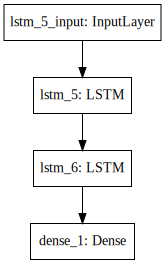

In [33]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [34]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'LTSM_stacked_uni_tesla' + mytime 

In [35]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 200)

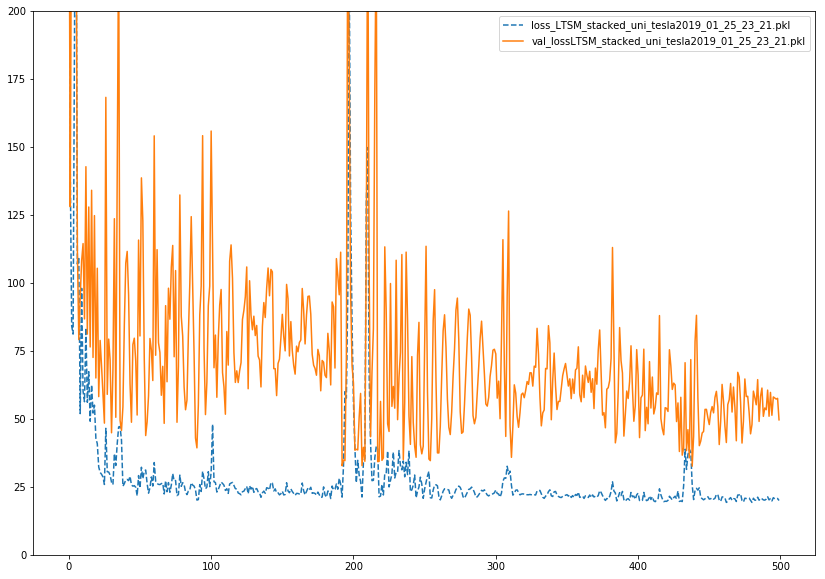

In [37]:
histories = ['LTSM_stacked_uni_tesla2019_01_25_23_21.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 200)

In [38]:
X_t = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [39]:
yhat = model.predict(X_t, verbose=2)

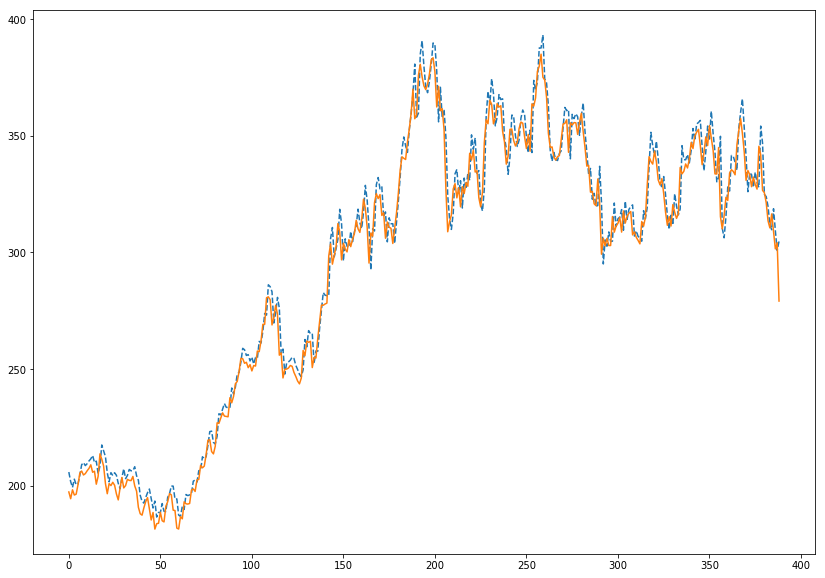

In [40]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(yhat,label ='prediction' ,linestyle='--')
plt.plot(y_test,label='real' )

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
r2_score(y_test, yhat) 

0.98250253348258321

In [43]:
mean_squared_error(y_test, yhat) 

61.272103962578633

In [54]:
test=X_test[-6:-1]

In [55]:
test

array([[ 341.84,  326.63,  325.6 ,  321.35,  313.56],
       [ 326.63,  325.6 ,  321.35,  313.56,  310.55],
       [ 325.6 ,  321.35,  313.56,  310.55,  316.53],
       [ 321.35,  313.56,  310.55,  316.53,  309.1 ],
       [ 313.56,  310.55,  316.53,  309.1 ,  301.54]])

In [56]:
test_t = test.reshape((test.shape[0], test.shape[1], n_features))

In [59]:
y_t = model.predict(test_t, verbose=2)

In [60]:
y_t


array([[ 311.95617676],
       [ 309.73999023],
       [ 318.75125122],
       [ 309.32055664],
       [ 300.87863159]], dtype=float32)